##Time Series (ARIMA)

Pada project kali ini menggunakan data yang sudah dicleansing dan langsung dapat digunakan. Datanya berasal dari Kable Nutritionals yang memiliki data customer, product, store dan transaction. Pada project ini menggunakan metode Time Series ARIMA dimana akan memprediksi total quantity harian
dari produk yang terjual.

Untuk prosesnya adalah

*   Import Library
*   Import Data
*   Cleaning Data
*   Merging Data
*   Feature Engineering
*   Exploratory Data Analysis
*   Modelling

#Importing Libraries

In [59]:
pip install --upgrade statsmodels


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy.ndimage.interpolation import shift
from sklearn.metrics import mean_squared_error
from math import sqrt

#Loading Data and Cleansing Data

In [61]:
customer_data = pd.read_csv("customer.csv")
product_data = pd.read_csv("product.csv")
store_data = pd.read_csv("store.csv")
transaction_data = pd.read_csv("transaction.csv")

Customer Data

In [62]:
customer_data

,customer_id,age,gender,marital_status,income
0,1,55,1,Married,5
1,2,60,1,Married,6
2,3,32,1,Married,9
3,4,31,1,Married,4
4,5,58,1,Married,3
...,...,...,...,...,...
442,443,33,1,NaN,9
443,444,53,0,Married,15
444,445,51,0,Married,14
445,446,57,0,Married,7


In [63]:
customer_data.shape

(447, 5)

In [64]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     447 non-null    int64 
 1   age             447 non-null    int64 
 2   gender          447 non-null    int64 
 3   marital_status  444 non-null    object
 4   income          447 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 17.6+ KB


In [65]:
customer_data.isnull().sum()

customer_id       0
age               0
gender            0
marital_status    3
income            0
dtype: int64

In [66]:
#ubah tipe data ke string
customer_data['marital_status']= customer_data['marital_status'].astype('string')
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     447 non-null    int64 
 1   age             447 non-null    int64 
 2   gender          447 non-null    int64 
 3   marital_status  444 non-null    string
 4   income          447 non-null    int64 
dtypes: int64(4), string(1)
memory usage: 17.6 KB
None


In [67]:
customer_data['marital_status'].fillna('Tidak tahu', inplace=True)
customer_data

,customer_id,age,gender,marital_status,income
0,1,55,1,Married,5
1,2,60,1,Married,6
2,3,32,1,Married,9
3,4,31,1,Married,4
4,5,58,1,Married,3
...,...,...,...,...,...
442,443,33,1,Tidak tahu,9
443,444,53,0,Married,15
444,445,51,0,Married,14
445,446,57,0,Married,7


In [68]:
customer_data.isnull().sum()

customer_id       0
age               0
gender            0
marital_status    0
income            0
dtype: int64

Product Data

In [69]:
product_data.head()

,product_id,product_name,price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [70]:
product_data.shape

(10, 3)

In [71]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    10 non-null     object
 1   product_name  10 non-null     object
 2   price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [72]:
#ubah tipe data ke string
product_data['product_name']= product_data['product_name'].astype('string')
print(product_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    10 non-null     object
 1   product_name  10 non-null     string
 2   price         10 non-null     int64 
dtypes: int64(1), object(1), string(1)
memory usage: 368.0+ bytes
None


In [73]:
product_data.isnull().sum()

product_id      0
product_name    0
price           0
dtype: int64

Store Data

In [74]:
store_data.head()

,store_id,store_name,group_store,type,latitude,longitude
0,1,Prima Tendean,Prima,Modern Trade,2,106
1,2,Prima Kelapa Dua,Prima,Modern Trade,914864,107
2,3,Prima Kota,Prima,Modern Trade,797068,110
3,4,Gita Ginara,Gita,General Trade,966667,110
4,5,Bonafid,Gita,General Trade,250445,112


In [75]:
store_data.shape

(14, 6)

In [76]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   store_id     14 non-null     int64 
 1   store_name   14 non-null     object
 2   group_store  14 non-null     object
 3   type         14 non-null     object
 4   latitude     14 non-null     int64 
 5   longitude    14 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 800.0+ bytes


In [77]:
#ubah tipe data ke string
store_data['store_name']= store_data['store_name'].astype('string')
store_data['group_store']= store_data['group_store'].astype('string')
store_data['type']= store_data['type'].astype('string')
print(store_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   store_id     14 non-null     int64 
 1   store_name   14 non-null     string
 2   group_store  14 non-null     string
 3   type         14 non-null     string
 4   latitude     14 non-null     int64 
 5   longitude    14 non-null     int64 
dtypes: int64(3), string(3)
memory usage: 800.0 bytes
None


In [78]:
store_data.isnull().sum()

store_id       0
store_name     0
group_store    0
type           0
latitude       0
longitude      0
dtype: int64

Transaction Data

In [79]:
transaction_data.head()

,transaction_id,customer_id,date,product_id,price,qty,total_amount,store_id
0,TR11369,328,01-01-22,P3,7500,4,30000,12
1,TR16356,165,01-01-22,P9,10000,7,70000,1
2,TR1984,183,01-01-22,P1,8800,4,35200,4
3,TR35256,160,01-01-22,P1,8800,7,61600,4
4,TR41231,386,01-01-22,P9,10000,1,10000,4


In [80]:
transaction_data.shape

(5020, 8)

In [81]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  5020 non-null   object
 1   customer_id     5020 non-null   int64 
 2   date            5020 non-null   object
 3   product_id      5020 non-null   object
 4   price           5020 non-null   int64 
 5   qty             5020 non-null   int64 
 6   total_amount    5020 non-null   int64 
 7   store_id        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [82]:
#ubah tipe data ke tanggal
transaction_data['date'] = pd.to_datetime(transaction_data['date'])
print(transaction_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  5020 non-null   object        
 1   customer_id     5020 non-null   int64         
 2   date            5020 non-null   datetime64[ns]
 3   product_id      5020 non-null   object        
 4   price           5020 non-null   int64         
 5   qty             5020 non-null   int64         
 6   total_amount    5020 non-null   int64         
 7   store_id        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB
None


In [83]:
#transaction_data

#Merging Data

In [84]:
merge_data = customer_data.merge(transaction_data, on='customer_id').merge(product_data, on='product_id').merge(store_data, on='store_id')

In [85]:
merge_data

,customer_id,age,gender,marital_status,income,transaction_id,date,product_id,price_x,qty,total_amount,store_id,product_name,price_y,store_name,group_store,type,latitude,longitude
0,1,55,1,Married,5,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,654703,128
1,5,58,1,Married,3,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,654703,128
2,7,31,0,Married,4,TR5151,2022-10-03,P8,16000,2,32000,9,Oat,16000,Lingga,Lingga,Modern Trade,654703,128
3,19,24,1,Single,4,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,654703,128
4,28,55,0,Married,6,TR9420,2022-12-01,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,654703,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,403,30,0,Married,4,TR21751,2022-07-10,P9,10000,5,50000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,316694,114
5016,410,55,1,Married,8,TR86692,2022-05-04,P9,10000,2,20000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,316694,114
5017,411,19,1,Single,0,TR67993,2022-10-23,P9,10000,2,20000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,316694,114
5018,427,54,0,Married,16,TR28578,2022-10-30,P9,10000,3,30000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,316694,114


In [86]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     5020 non-null   int64         
 1   age             5020 non-null   int64         
 2   gender          5020 non-null   int64         
 3   marital_status  5020 non-null   string        
 4   income          5020 non-null   int64         
 5   transaction_id  5020 non-null   object        
 6   date            5020 non-null   datetime64[ns]
 7   product_id      5020 non-null   object        
 8   price_x         5020 non-null   int64         
 9   qty             5020 non-null   int64         
 10  total_amount    5020 non-null   int64         
 11  store_id        5020 non-null   int64         
 12  product_name    5020 non-null   string        
 13  price_y         5020 non-null   int64         
 14  store_name      5020 non-null   string        
 15  grou

In [87]:
merge_data.isnull().sum()

customer_id       0
age               0
gender            0
marital_status    0
income            0
transaction_id    0
date              0
product_id        0
price_x           0
qty               0
total_amount      0
store_id          0
product_name      0
price_y           0
store_name        0
group_store       0
type              0
latitude          0
longitude         0
dtype: int64

#Feature Engineering

In [88]:
data_fix = merge_data.groupby(['date']).agg(
    total_quality = ('qty','sum'),
)
data_fix.sort_values(by="date", ascending=False)

,total_quality
date,
2022-12-31,37
2022-12-30,44
2022-12-29,42
2022-12-28,68
2022-12-27,70
...,...
2022-01-05,67
2022-01-04,98
2022-01-03,76


In [89]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   total_quality  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


#Exploratory Data Analysis

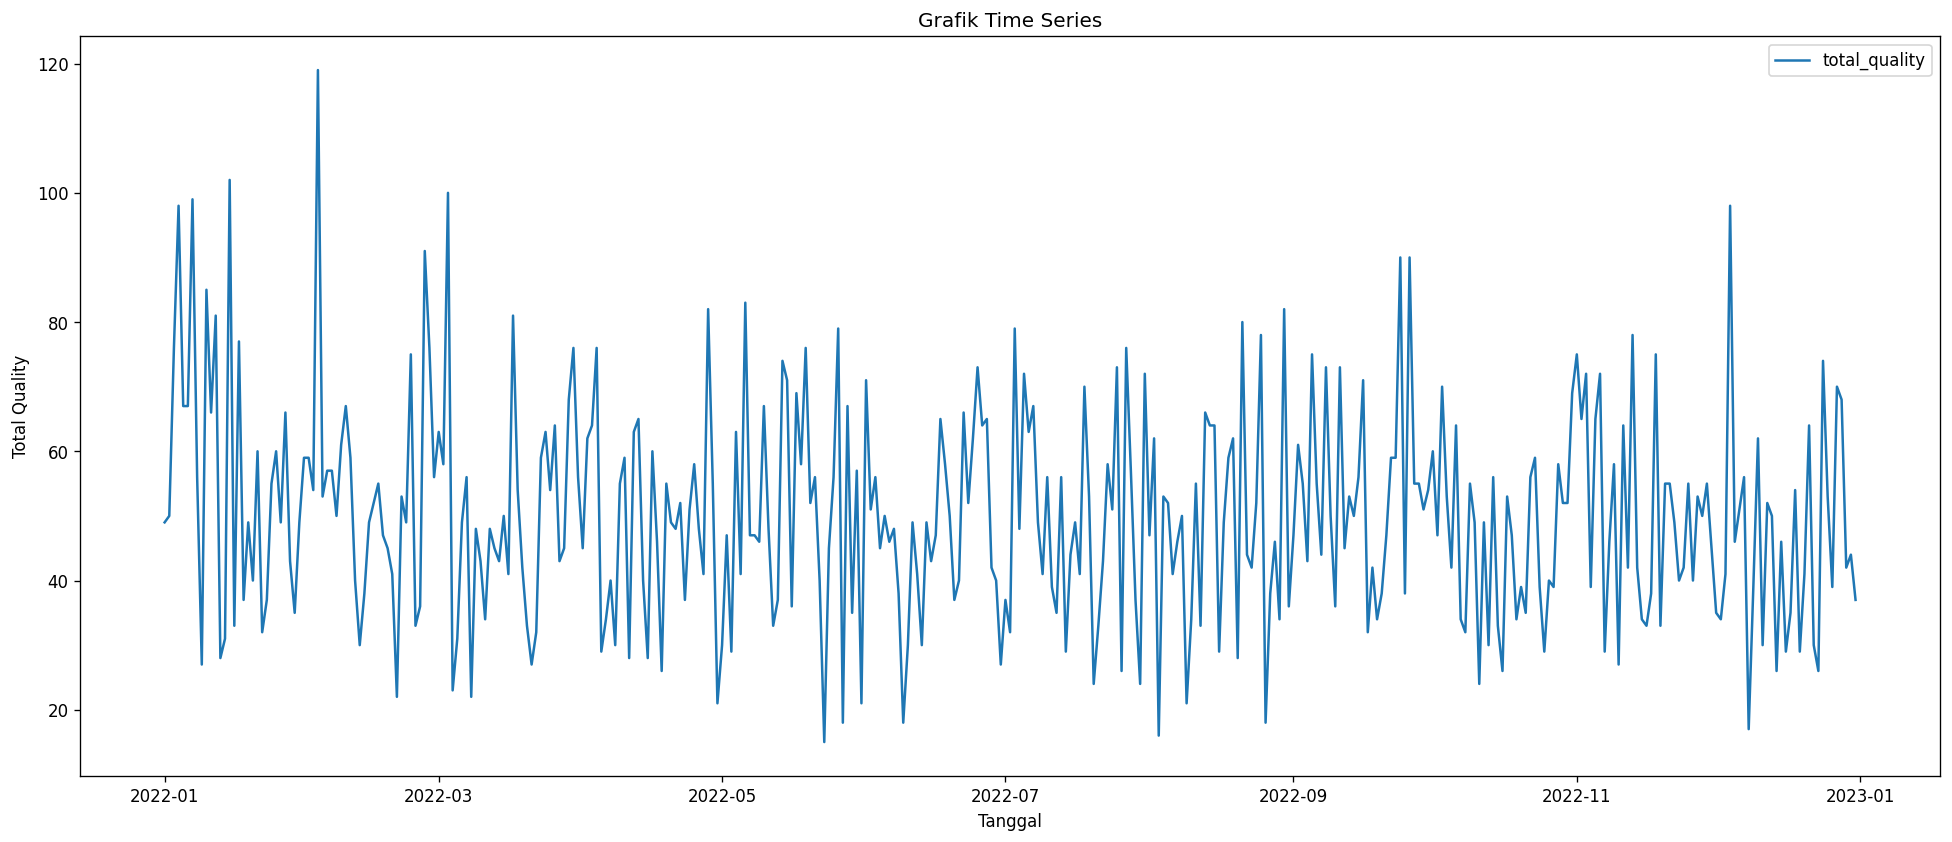

In [90]:
plt.figure(figsize=(20, 8))
plt.plot(data_fix.index, data_fix['total_quality'], label='total_quality')
plt.xlabel('Tanggal')
plt.ylabel('Total Quality')
plt.title('Grafik Time Series')
plt.legend()
plt.show()

#Arima

In [91]:
import pandas as pd
from pandas import datetime as dt
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.api import tsa
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

Mencari nilai p, q dan d untuk parameter metode Arima

In [92]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_fix['total_quality'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.018783
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


Mencari nilai d

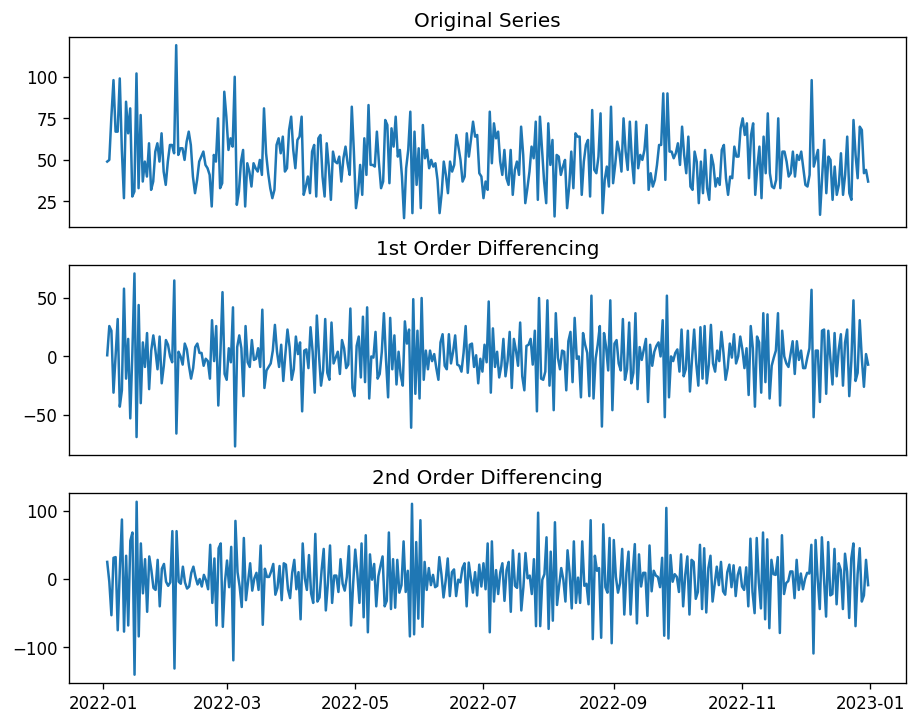

In [93]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data_fix.total_quality); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data_fix.total_quality.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data_fix.total_quality.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

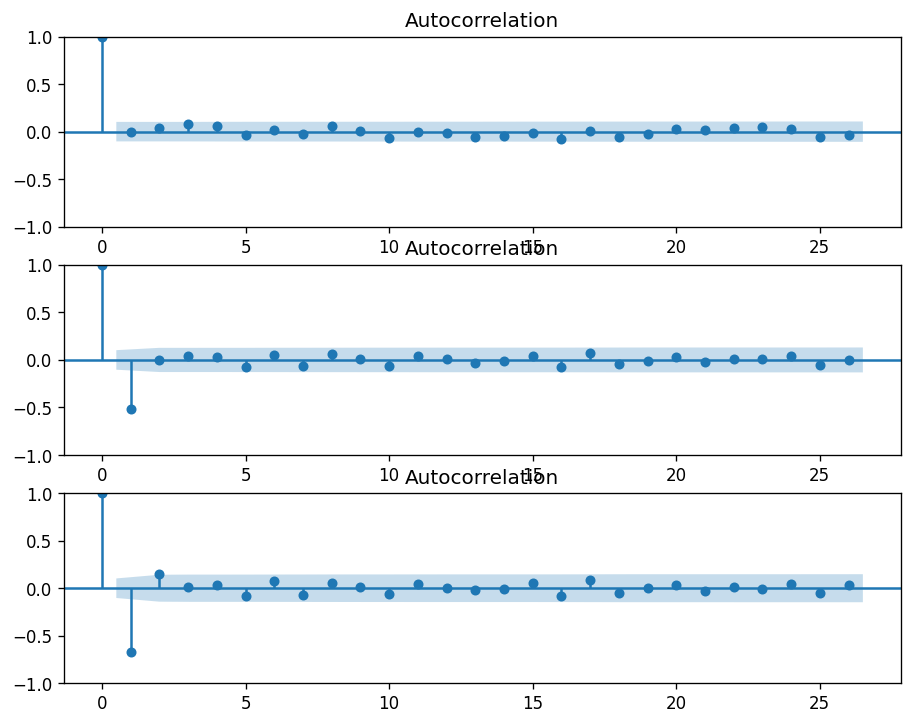

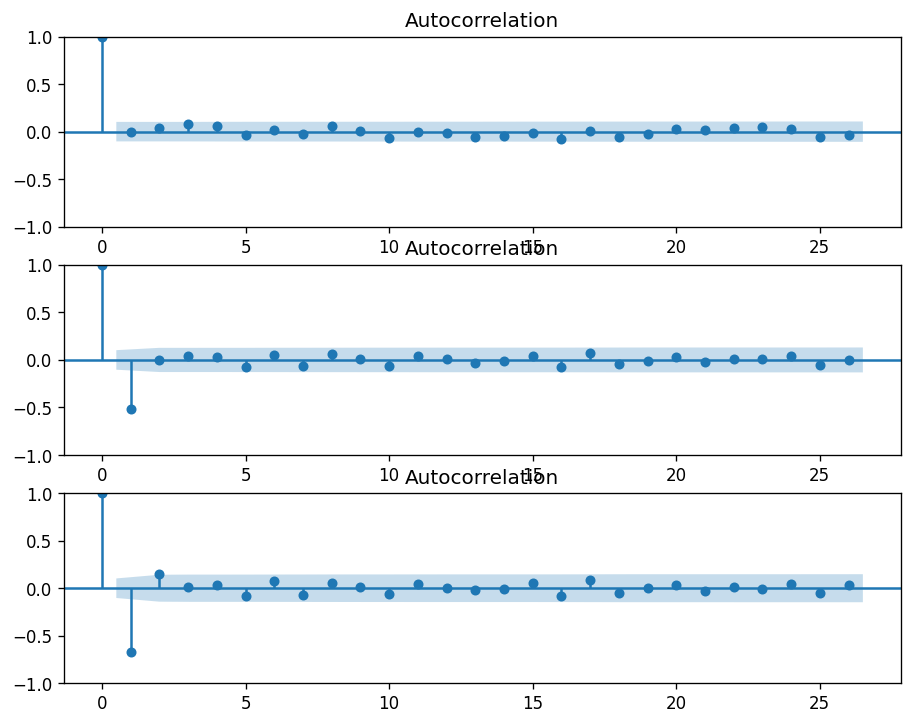

In [94]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data_fix.total_quality, ax=ax1)
plot_acf(data_fix.total_quality.diff().dropna(), ax=ax2)
plot_acf(data_fix.total_quality.diff().diff().dropna(), ax=ax3)

Dari grafik diatas didapatkan bahwa nilai d adalah 1 karena lag pertama jauh di luar batas dan yang kedua juga di luar batas signifikan tetapi tidak terlalu jauh sehingga kita dapat memilih urutan d sebagai 1.

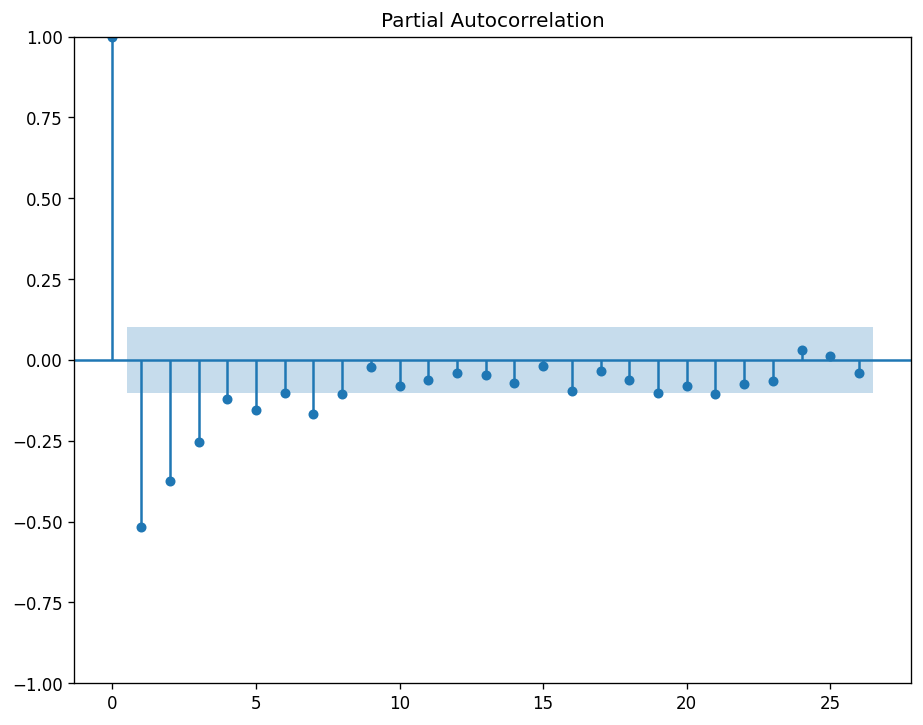

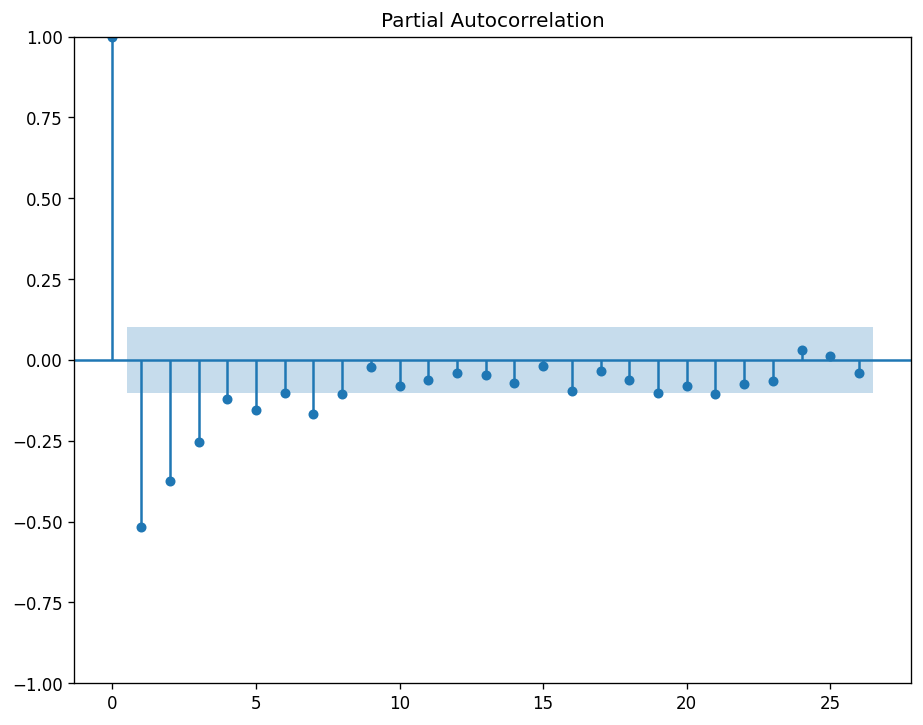

In [95]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_fix.total_quality.diff().dropna())

Dari grafik diatas didapatkan bahwa nilai p adalah 1 karena lag pertama jauh di luar batas dan yang kedua juga di luar batas signifikan tetapi tidak terlalu jauh sehingga kita dapat memilih urutan p sebagai 1.

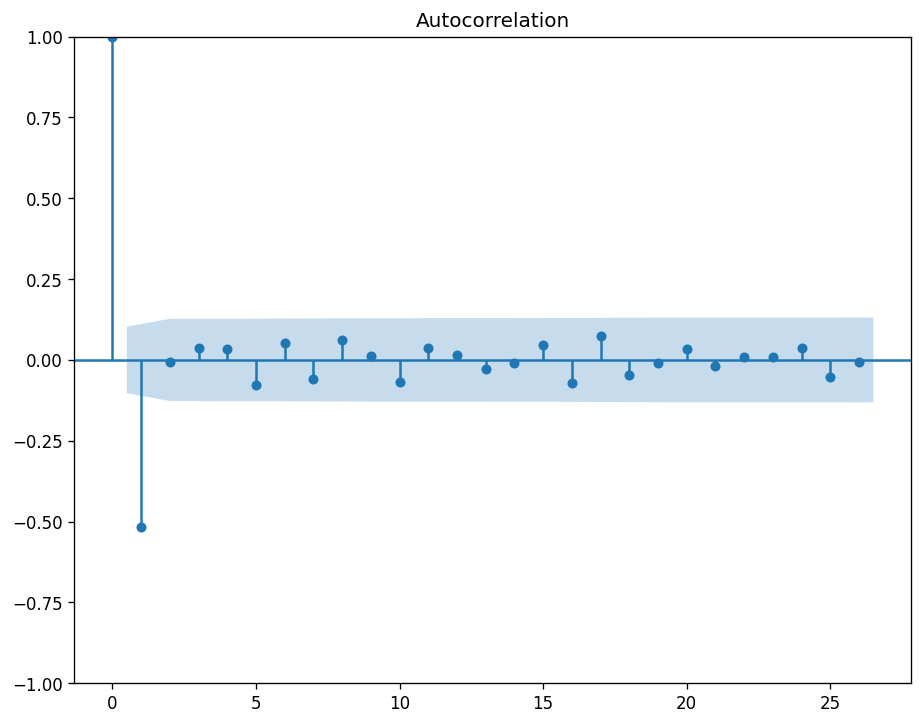

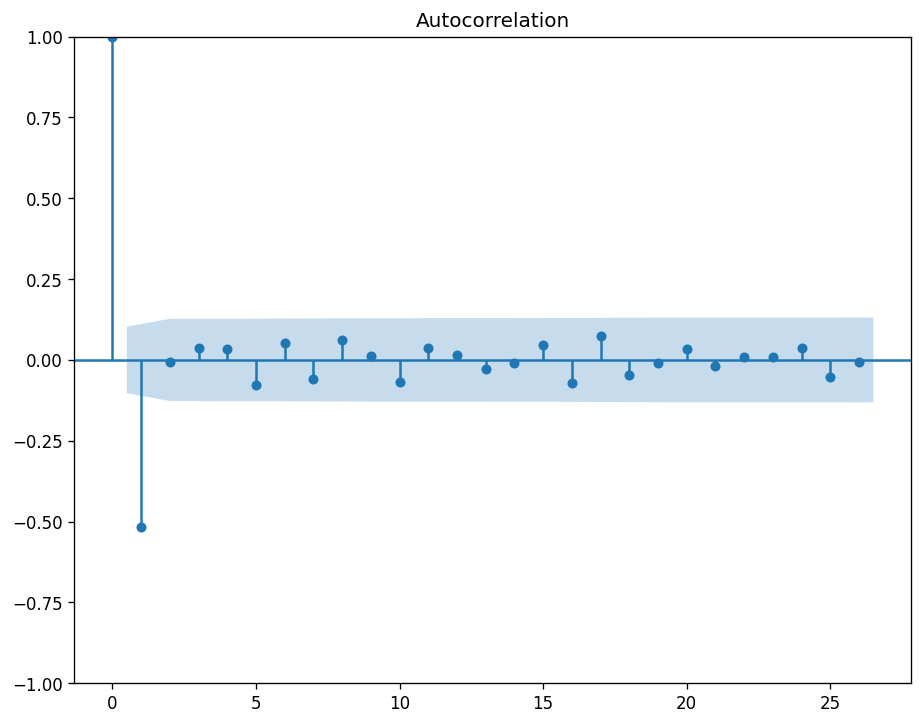

In [96]:
plot_acf(data_fix.total_quality.diff().dropna())

Dari grafik diatas didapatkan bahwa nilai q adalah 1 karena lag pertama jauh di luar batas dan yang kedua juga di luar batas signifikan tetapi tidak terlalu jauh sehingga kita dapat memilih urutan q sebagai 1.

Modelling Arima dengan parameter p, q dan d yang sudah diketahui yaitu (1,1,1)

In [97]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_fix.total_quality, order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          total_quality   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1543.251
Date:                Mon, 25 Sep 2023   AIC                           3092.501
Time:                        12:33:54   BIC                           3104.193
Sample:                    01-01-2022   HQIC                          3097.148
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0148      0.054     -0.275      0.783      -0.120       0.091
ma.L1         -0.9818      0.014    -68.372      0.000      -1.010      -0.954
sigma2       279.3095     20.718     13.481      0.000     238.702     319.917
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                10.14
Prob(Q):                              0.85   Prob(JB):                         0.01
Heteroskedasticity (H):               0.68   Skew:                             0.39
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Gambar grafik prediksi total quality setiap hari dari produk yang dijual

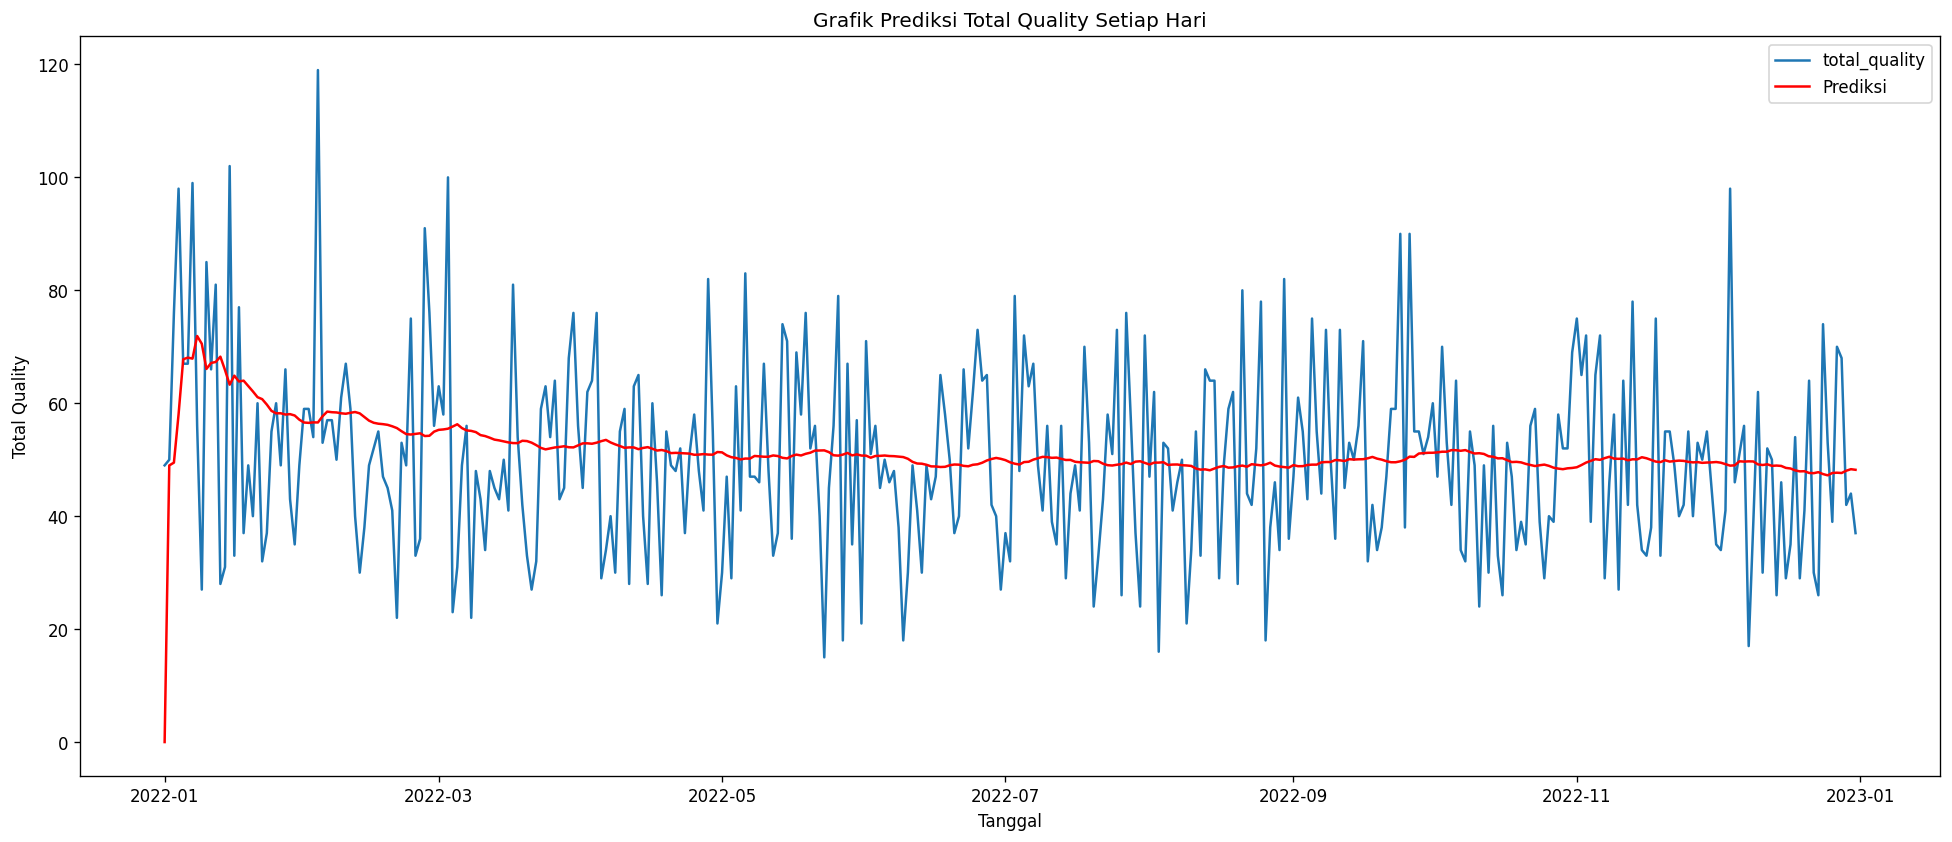

In [98]:
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(data_fix['total_quality'], order=(1,1,1))
ax = plt.gca()
results = model.fit()
plt.xlabel('Tanggal')
plt.ylabel('Total Quality')
plt.title('Grafik Prediksi Total Quality Setiap Hari')
plt.plot(data_fix['total_quality'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['total_quality', 'Prediksi'])